In [1]:
import helperfunction as hf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.precision', 3)

In [2]:
filepath = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/rt.movie_info.tsv.gz'
rt_movie = pd.read_csv(filepath, sep='\t', encoding='latin-1')

In [3]:
rt_movie.head()
# remove 'synopsis', 'dvd_date','currency','studio'
hf.drop_columns(
    rt_movie, 'synopsis', 'dvd_date', 'currency', 'studio')

In [4]:
filepath2 = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/rt.reviews.tsv.gz'
rt_reviews = pd.read_csv(filepath2, sep='\t', encoding='latin-1')

In [5]:
rt_reviews.head()
# remove review, rating, critic, top_critic, publisher, date
hf.drop_columns(
    rt_reviews, 'review', 'rating', 'critic', 'top_critic', 'publisher', 'date')

In [6]:
# combine the two table by id
rt_merged = hf.merge_tables(rt_movie, rt_reviews, 'id', 'inner')

In [7]:
hf.rename_columns(rt_merged, {'rating': 'parental_guide'})

In [8]:
# format fresh column to 0 and 1
rt_merged['fresh'] = hf.object_binary(rt_merged, 'fresh', 'fresh')

In [9]:
# groupby theater_date (assume unique movie) then count average tomatoes
fresh_percent = rt_merged.groupby('id').fresh.mean().reset_index()

In [10]:
# remove duplicate rows and remove fresh
hf.drop_repeatrows(rt_merged, 'id')
hf.drop_columns(rt_merged, 'fresh')

In [11]:
# merged with fresh % to analyze box office and fresh %
rt_merged = hf.merge_tables(fresh_percent, rt_merged, 'id', 'inner')

In [12]:
# edit box_office into int for scatter plot
hf.stringtonum(rt_merged, ['box_office'], ',')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


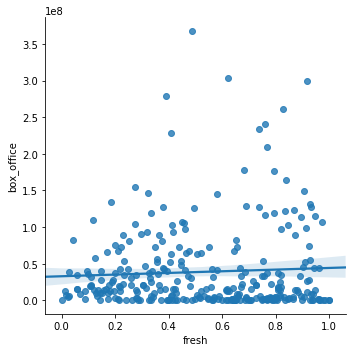

In [13]:
# check for relationship
sns.lmplot(x="fresh", y="box_office", data=rt_merged)

In [14]:
hf.drop_NA(rt_merged, ['genre'])

In [15]:
# split into separate genres and check for genres effect on fresh_percent
# which genres produce most fresh
# hf.drop_NA(rt_merged, ['genre'])
genres_table = hf.split_rows(rt_merged, 'id', 'genre', sep='|')

In [16]:
# join fresh with genres
genres_fresh = hf.merge_tables(
    genres_table, fresh_percent, 'id', 'left')

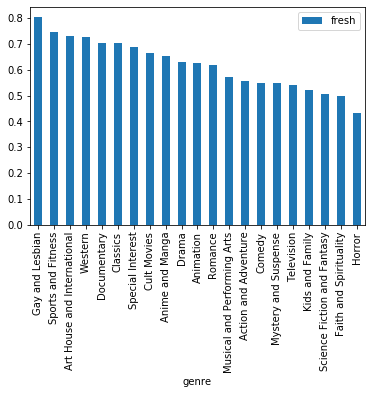

In [17]:
# check for which genres produce most critically acclaimed fresh tomatoes
genres_fresh[['genre', 'fresh']].groupby('genre').mean(
).sort_values('fresh', ascending=False).plot.bar()

In [18]:
# save picklefile
genres_fresh.to_pickle('genre_fresh.pkl')
rt_merged.to_pickle('rottonmerged.pkl')